# Gesture Detection Model

## 1 Engineer features

### 1.1 Import libraries and transformers  

In [1]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
from keras.utils import to_categorical
warnings.filterwarnings("ignore")

Using TensorFlow backend.


In [2]:
import os
os.getcwd()

'C:\\Users\\Christian\\git\\drone_steering\\models'

In [3]:
os.chdir('..')

In [4]:
from app_local.module import DataEnsembler, LabelGenerator, GestureTransformer

### 1.2  Load data

In [5]:
de = DataEnsembler(ms_per_frame=120)
de.investigate_available_datafiles(data_dir='data/gesture/', is_frame_based = True)
de.combined_data_files_df

,filename_features,filename_labels
0,features_flip_c_01_120.csv,labels_flip_c_01_per_frame.csv
1,features_flip_c_02_120.csv,labels_flip_c_02_per_frame.csv
2,features_flip_c_03_120.csv,labels_flip_c_03_per_frame.csv
3,features_flip_l_01_120.csv,labels_flip_l_01_per_frame.csv
4,features_flip_l_02_120.csv,labels_flip_l_02_per_frame.csv
5,features_flip_l_03_120.csv,labels_flip_l_03_per_frame.csv
6,features_flip_p_01_120.csv,labels_flip_p_01_per_frame.csv
7,features_land_c_01_120.csv,labels_land_c_01_per_frame.csv
8,features_land_c_02_120.csv,labels_land_c_02_per_frame.csv
9,features_land_c_03_120.csv,labels_land_c_03_per_frame.csv


In [6]:
de.load_data()
de.assemble_data(max_error=500, tolerance_range= 600)
de.display_information()

i: 0 	shape X: (537, 17, 16) 	shape y: (537,) 	count: 55
i: 1 	shape X: (520, 17, 16) 	shape y: (520,) 	count: 37
i: 2 	shape X: (499, 17, 16) 	shape y: (499,) 	count: 59
i: 3 	shape X: (557, 17, 16) 	shape y: (557,) 	count: 135
i: 4 	shape X: (509, 17, 16) 	shape y: (509,) 	count: 95
i: 5 	shape X: (467, 17, 16) 	shape y: (467,) 	count: 90
i: 6 	shape X: (532, 17, 16) 	shape y: (532,) 	count: 88
i: 7 	shape X: (441, 17, 16) 	shape y: (441,) 	count: 83
i: 8 	shape X: (491, 17, 16) 	shape y: (491,) 	count: 70
i: 9 	shape X: (477, 17, 16) 	shape y: (477,) 	count: 74
i: 10 	shape X: (493, 17, 16) 	shape y: (493,) 	count: 85
i: 11 	shape X: (437, 17, 16) 	shape y: (437,) 	count: 63
i: 12 	shape X: (467, 17, 16) 	shape y: (467,) 	count: 86
i: 13 	shape X: (649, 17, 16) 	shape y: (649,) 	count: 57
i: 14 	shape X: (588, 17, 16) 	shape y: (588,) 	count: 150
i: 15 	shape X: (565, 17, 16) 	shape y: (565,) 	count: 115
i: 16 	shape X: (541, 17, 16) 	shape y: (541,) 	count: 0
i: 17 	shape X: (470, 

### 1.3  Transform data

In [7]:
from keras.utils import to_categorical

X = de.X.copy()
y = de.y.copy()

print("---------------------------------------------------------------------")
print("Shapes before removal of 'no movements':") 
print("y: " + str(y.shape))
print("X: " + str(X.shape))
print("")

# only select certain indices to prevent too many 0-labeled instances
idx = []
for i in range(7):
    idx.append(np.where(np.isclose(y,i))[0])

print("Labels before removal of 'no movements'")
for i in range(7):
    print(i,len(idx[i]))
print("")
    
zero_idx = np.random.choice(idx[0], 500, replace=False)
keep_idx = np.concatenate([zero_idx,idx[1],idx[2],idx[3],idx[4],idx[5],idx[6]])
keep_idx = sorted(keep_idx)

print("---------------------------------------------------------------------")
y = y[keep_idx]
X = X[keep_idx]
print("Shapes after removal of 'no movements':") 
print("y: " + str(y.shape))
print("X: " + str(X.shape))
print("")

idx = []
for i in range(7):
    idx.append(np.where(np.isclose(y,i))[0])

print("Labels after removal of 'no movements'")
for i in range(7):
    print(i,len(idx[i]))
print("")    
    
# print("---------------------------------------------------------------------")
# print("Features:")
# print(de.LabelGenerators[0].feature_names)


print("---------------------------------------------------------------------")
gt = GestureTransformer(feature_names = list(de.LabelGenerators[0].feature_names),byrow=True)
X = gt.transform(X)

y = to_categorical(y)

print("Shapes after transformation:") 
print("y: " + str(y.shape))
print("X: " + str(X.shape))

---------------------------------------------------------------------
Shapes before removal of 'no movements':
y: (11723,)
X: (11723, 17, 16)

Labels before removal of 'no movements'
0 9923
1 361
2 322
3 559
4 0
5 97
6 461

---------------------------------------------------------------------
Shapes after removal of 'no movements':
y: (2300,)
X: (2300, 17, 16)

Labels after removal of 'no movements'
0 500
1 361
2 322
3 559
4 0
5 97
6 461

---------------------------------------------------------------------
Shapes after transformation:
y: (2300, 7)
X: (2300, 17, 16)


## 2 Train model

### 2.1  Split in train / test

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

### 2.2 Define and compile model

In [9]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import LSTM

In [10]:
n_timesteps = X.shape[1] # here 17
n_features = X.shape[2] # here 16
n_outputs =  y.shape[1] # here 7 (number of labels)

model = Sequential()
model.add(LSTM(100, input_shape=(n_timesteps,n_features)))
model.add(Dropout(0.4))
model.add(Dense(100, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(n_outputs, activation='softmax'))

model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 100)               46800     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                6464      
_________________________________________________________________
dense_3 (Dense)              (None, 7)                 455       
Total params: 63,819
Trainable params: 63,819
Non-trainable params: 0
_________________________________________________________________


### 2.3 Fit and validate model

In [11]:
history = model.fit(X_train, y_train, epochs=50, batch_size=16, verbose=1)

Epoch 1/50
1840/1840 [==============================] - 4s 2ms/step - loss: 1.1188 - acc: 0.5576
Epoch 2/50
1840/1840 [==============================] - 2s 1ms/step - loss: 0.5911 - acc: 0.7766
Epoch 3/50
1840/1840 [==============================] - 2s 1ms/step - loss: 0.5082 - acc: 0.8092
Epoch 4/50
1840/1840 [==============================] - 2s 1ms/step - loss: 0.4665 - acc: 0.8299
Epoch 5/50
1840/1840 [==============================] - 2s 1ms/step - loss: 0.4583 - acc: 0.8283
Epoch 6/50
1840/1840 [==============================] - 2s 1ms/step - loss: 0.4387 - acc: 0.8375
Epoch 7/50
1840/1840 [==============================] - 2s 1ms/step - loss: 0.4195 - acc: 0.8489
Epoch 8/50
1840/1840 [==============================] - 2s 1ms/step - loss: 0.4310 - acc: 0.8397
Epoch 9/50
1840/1840 [==============================] - 2s 1ms/step - loss: 0.4039 - acc: 0.8554
Epoch 10/50
1840/1840 [==============================] - 2s 1ms/step - loss: 0.3925 - acc: 0.8522
Epoch 11/50
1840/1840 [======

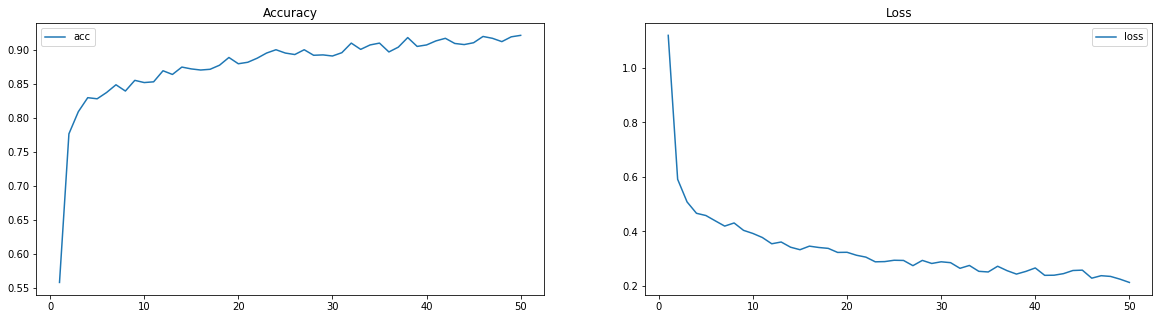

In [12]:
r = range(1, len(history.history["acc"]) + 1)

plt.figure(figsize=(20, 5))

plt.subplot(1, 2, 1)
plt.plot(r, history.history["acc"], label="acc")
plt.legend()
plt.title("Accuracy")

plt.subplot(1, 2, 2)
plt.plot(r, history.history["loss"], label="loss")
plt.legend()
plt.title("Loss")

plt.show()
plt.close()

In [13]:
eval_results = np.round(model.evaluate(X_test, y_test, batch_size=16, verbose=1),2)
print("Loss:     " + str(eval_results[0]))
print("Accuracy: " + str(eval_results[1]))

460/460 [==============================] - 0s 844us/step
Loss:     0.3
Accuracy: 0.89


In [14]:
for i in range(X_test.shape[0]):
    if (model.predict_classes(X_test[i:(i+1),:,:])[0]!=np.nonzero(y_test[i])[0][0]):
        print("Index:",i,\
              "\tPred:",model.predict_classes(X_test[i:(i+1),:,:])[0],\
              "\tActual:",np.nonzero(y_test[i])[0][0],\
              "\tProbability:",round(np.max(model.predict_proba(X_test[i:(i+1),:,:])),2))

Index: 4 	Pred: 6 	Actual: 0 	Probability: 0.62
Index: 6 	Pred: 3 	Actual: 0 	Probability: 0.47
Index: 39 	Pred: 3 	Actual: 0 	Probability: 0.54
Index: 47 	Pred: 6 	Actual: 0 	Probability: 0.64
Index: 58 	Pred: 3 	Actual: 0 	Probability: 0.78
Index: 65 	Pred: 5 	Actual: 1 	Probability: 0.6
Index: 76 	Pred: 5 	Actual: 1 	Probability: 0.77
Index: 79 	Pred: 1 	Actual: 0 	Probability: 0.99
Index: 80 	Pred: 3 	Actual: 0 	Probability: 0.79
Index: 91 	Pred: 2 	Actual: 0 	Probability: 0.68
Index: 109 	Pred: 3 	Actual: 6 	Probability: 0.68
Index: 124 	Pred: 3 	Actual: 0 	Probability: 0.82
Index: 137 	Pred: 3 	Actual: 0 	Probability: 0.81
Index: 152 	Pred: 0 	Actual: 3 	Probability: 0.83
Index: 158 	Pred: 5 	Actual: 0 	Probability: 0.84
Index: 167 	Pred: 6 	Actual: 0 	Probability: 1.0
Index: 172 	Pred: 2 	Actual: 0 	Probability: 0.98
Index: 175 	Pred: 1 	Actual: 5 	Probability: 0.71
Index: 178 	Pred: 3 	Actual: 0 	Probability: 0.55
Index: 193 	Pred: 2 	Actual: 0 	Probability: 0.89
Index: 221 	Pr

In [15]:
for i in range(X_test.shape[0]):
    if (model.predict_classes(X_test[i:(i+1),:,:])[0]==np.nonzero(y_test[i])[0][0]):
        print("Index:",i,\
              "\tPred:",model.predict_classes(X_test[i:(i+1),:,:])[0],\
              "\tActual:",np.nonzero(y_test[i])[0][0],\
              "\tProbability:",round(np.max(model.predict_proba(X_test[i:(i+1),:,:])),2))

Index: 0 	Pred: 1 	Actual: 1 	Probability: 1.0
Index: 1 	Pred: 1 	Actual: 1 	Probability: 0.99
Index: 2 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 3 	Pred: 3 	Actual: 3 	Probability: 0.91
Index: 5 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 7 	Pred: 0 	Actual: 0 	Probability: 0.73
Index: 8 	Pred: 6 	Actual: 6 	Probability: 0.99
Index: 9 	Pred: 2 	Actual: 2 	Probability: 0.99
Index: 10 	Pred: 6 	Actual: 6 	Probability: 0.96
Index: 11 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 12 	Pred: 6 	Actual: 6 	Probability: 0.98
Index: 13 	Pred: 6 	Actual: 6 	Probability: 0.99
Index: 14 	Pred: 3 	Actual: 3 	Probability: 0.95
Index: 15 	Pred: 3 	Actual: 3 	Probability: 0.95
Index: 16 	Pred: 2 	Actual: 2 	Probability: 0.97
Index: 17 	Pred: 1 	Actual: 1 	Probability: 0.96
Index: 18 	Pred: 3 	Actual: 3 	Probability: 0.88
Index: 19 	Pred: 3 	Actual: 3 	Probability: 0.93
Index: 20 	Pred: 1 	Actual: 1 	Probability: 0.99
Index: 21 	Pred: 3 	Actual: 3 	Probability: 0.92
Index: 22 	Pred: 1 	Actual: 1 	P

Index: 190 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 191 	Pred: 2 	Actual: 2 	Probability: 0.97
Index: 192 	Pred: 2 	Actual: 2 	Probability: 0.98
Index: 194 	Pred: 2 	Actual: 2 	Probability: 0.91
Index: 195 	Pred: 6 	Actual: 6 	Probability: 1.0
Index: 196 	Pred: 1 	Actual: 1 	Probability: 1.0
Index: 197 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 198 	Pred: 2 	Actual: 2 	Probability: 0.99
Index: 199 	Pred: 6 	Actual: 6 	Probability: 1.0
Index: 200 	Pred: 2 	Actual: 2 	Probability: 0.99
Index: 201 	Pred: 6 	Actual: 6 	Probability: 0.99
Index: 202 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 203 	Pred: 1 	Actual: 1 	Probability: 1.0
Index: 204 	Pred: 5 	Actual: 5 	Probability: 0.84
Index: 205 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 206 	Pred: 2 	Actual: 2 	Probability: 0.98
Index: 207 	Pred: 1 	Actual: 1 	Probability: 1.0
Index: 208 	Pred: 6 	Actual: 6 	Probability: 0.9
Index: 209 	Pred: 2 	Actual: 2 	Probability: 0.99
Index: 210 	Pred: 3 	Actual: 3 	Probability: 0.97
Index: 211

Index: 386 	Pred: 3 	Actual: 3 	Probability: 0.91
Index: 387 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 388 	Pred: 3 	Actual: 3 	Probability: 0.93
Index: 389 	Pred: 6 	Actual: 6 	Probability: 0.97
Index: 390 	Pred: 6 	Actual: 6 	Probability: 0.99
Index: 391 	Pred: 2 	Actual: 2 	Probability: 0.94
Index: 392 	Pred: 1 	Actual: 1 	Probability: 1.0
Index: 393 	Pred: 3 	Actual: 3 	Probability: 0.96
Index: 394 	Pred: 1 	Actual: 1 	Probability: 0.94
Index: 395 	Pred: 5 	Actual: 5 	Probability: 0.59
Index: 396 	Pred: 1 	Actual: 1 	Probability: 1.0
Index: 397 	Pred: 0 	Actual: 0 	Probability: 0.89
Index: 398 	Pred: 2 	Actual: 2 	Probability: 0.96
Index: 399 	Pred: 6 	Actual: 6 	Probability: 0.99
Index: 400 	Pred: 6 	Actual: 6 	Probability: 0.95
Index: 401 	Pred: 2 	Actual: 2 	Probability: 0.99
Index: 402 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 403 	Pred: 1 	Actual: 1 	Probability: 1.0
Index: 405 	Pred: 1 	Actual: 1 	Probability: 1.0
Index: 406 	Pred: 1 	Actual: 1 	Probability: 1.0
Index: 

### 2.4 Save model

In [16]:
from keras.models import load_model
import h5py

In [17]:
# save model, delete current reference and re-load it from file
model.save('model_gesture.h5')
del model
model = load_model('../model_gesture.h5')

In [18]:
type(model)

keras.engine.sequential.Sequential